In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([ [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1,1]])

and_y = np.array([0, 0, 0, 1])
nand_y = np.array([1, 1, 1, 0])
or_y = np.array([0, 1, 1, 1])

w = np.random.rand(3)
# w = np.array([0.5, 0.5, 0.5])
not_y = np.array([1, 0])
not_x = np.array([[1, 0], [1, 1]])
not_w = np.random.rand(2)

In [3]:
def net(w, x):
    return np.dot(w, x)

In [4]:
def plot_graph(w):
    if len(w) != 2:
        axes = plt.gca()
        axes.set_xlim(-2, 2)
        slope = -w[1]/w[2]
        intercept = -w[0]/w[2]
        x_vals = np.array(axes.get_xlim())
        y_vals = intercept + slope * x_vals
        plt.plot(x_vals, y_vals, '--')
        plt.scatter([0, 0, 1], [0, 1, 0])
        plt.scatter([1], [1], color="red")
        plt.show()
    else:
        range_x = np.linspace(-1.0, 1.0, num=10)
        fig, ax = plt.subplots()
        w_plot = w / w[1]
        ax.plot(np.array([-1 * w_plot[0]] * len(range_x)), range_x)
        plt.scatter([0], [1])
        plt.scatter([1], [0], color="red")
        plt.show()

In [5]:
def converge(x, y, w):
    convergence = False
    while not convergence:
        w_start_epoch = w
        for i in range(len(y)):
            net_val = np.dot(w, x[i])
            y_pred = 0
            if net_val > 0:
                y_pred = 1
            if y[i] == y_pred:
                continue
            else:
                if y[i] == 0:
                    w = w - x[i]
                else:
                    w = w + x[i]
        if np.array_equal(w, w_start_epoch):
            convergence  = True
    plot_graph(w)
    return w

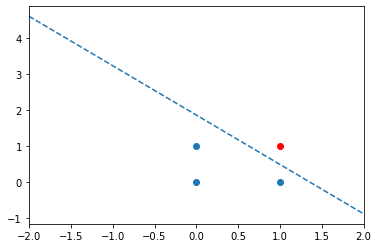

[-2.49884884  1.83233502  1.33504477]


In [6]:
w = converge(x, and_y, w)
print(w)

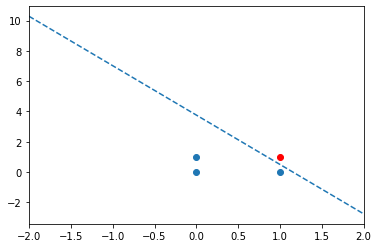

[ 2.50115116 -2.16766498 -0.66495523]


In [7]:
w = converge(x, nand_y, w)
print(w)

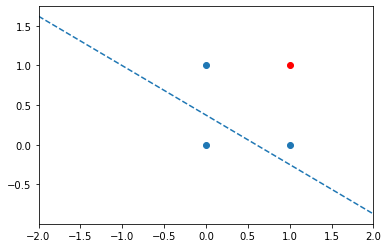

[-0.49884884  0.83233502  1.33504477]


In [8]:
w = converge(x, or_y, w)
print(w)


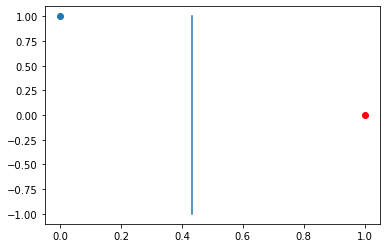

[ 0.75094685 -1.73819335]


In [9]:
w = converge(not_x, not_y, not_w)
print(w)